In [1]:
!pip install sklearn

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
import pandas as pd
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
glucose_mean = data['Glucose'].mean()
glucose_mean

120.89453125

In [7]:
bp_mean = data['Glucose'].mean()

In [8]:
st_mean = data.SkinThickness.mean()

In [9]:
insulin_mean = data.Insulin.mean()
insulin_mean

79.79947916666667

In [10]:
data['Glucose'] = data['Glucose'].replace(0, int(glucose_mean))

In [11]:
data['BloodPressure'] = data['BloodPressure'].replace(0, int(bp_mean))

In [12]:
data['SkinThickness'] = data['SkinThickness'].replace(0, int(st_mean))

In [13]:
data['Insulin'] = data['Insulin'].replace(0, int(insulin_mean))

In [14]:
data['BMI'] = data['BMI'].replace(0, 14)

In [15]:
data['Insulin'] = data['Insulin'].mask(data['Insulin'] > 300, 300)

In [16]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.700000,72.744000,25.224000,101.838000,30.556200,0.429734,31.190000
1,4.865672,142.152985,77.988806,28.731343,128.895522,35.247015,0.550500,37.067164


In [17]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.675781,74.574219,26.447917,111.279948,32.193099,0.471876,33.240885,0.348958
std,3.369578,30.436252,15.651842,9.733872,65.649427,7.216896,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,14.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.000000,79.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,73.000000,23.000000,79.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,82.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,300.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

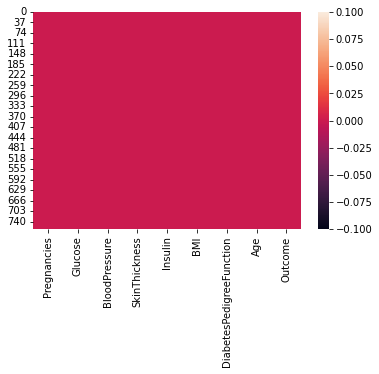

In [19]:
import seaborn as sns
sns.heatmap(data.isnull())

In [20]:
corr = data.corr()
print(corr)
top_corr_features = corr.index
plt.figure(figsize = (20,20))

                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.128022  ...  0.544341  0.221898
Glucose                      0.128022  1.000000  ...  0.266673  0.492884
BloodPressure                0.152239  0.151202  ...  0.221048  0.159823
SkinThickness                0.009393  0.158060  ...  0.020582  0.171857
Insulin                     -0.006540  0.408538  ...  0.031713  0.196576
BMI                          0.019847  0.240955  ...  0.033001  0.310007
DiabetesPedigreeFunction    -0.033523  0.137158  ...  0.033561  0.173844
Age                          0.544341  0.266673  ...  1.000000  0.238356
Outcome                      0.221898  0.492884  ...  0.238356  1.000000

[9 rows x 9 columns]


<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [21]:
sns.set(rc = {'figure.figsize':(15,8)})

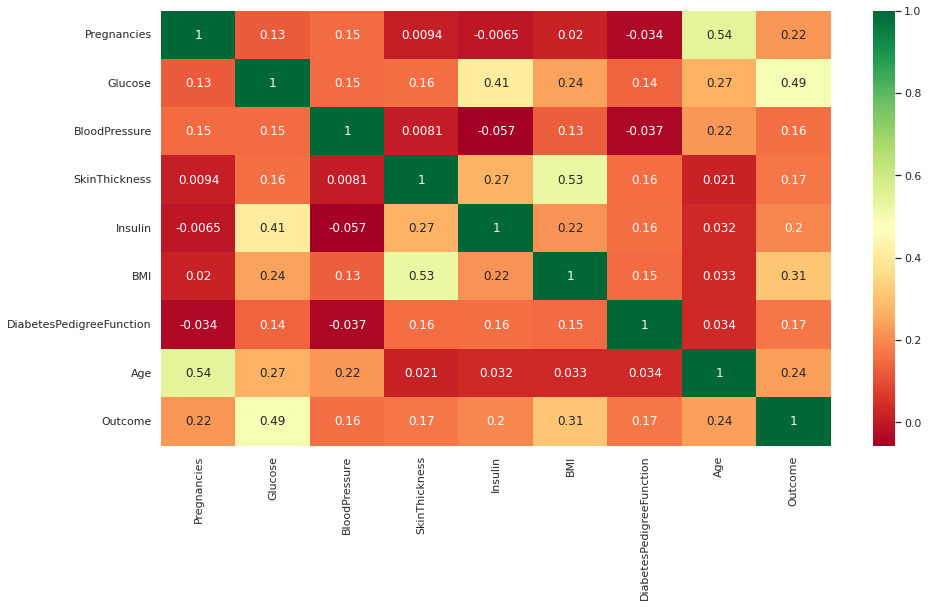

In [22]:
sns.heatmap(data[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

In [23]:
from sklearn.model_selection import train_test_split
X = data.drop("Outcome", axis = 1)
Y= data['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 8)
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
302,5,77,82,41,42,35.8,0.156,35
131,9,122,56,20,79,33.3,1.114,33
124,0,113,76,20,79,33.3,0.278,23
486,1,139,62,41,300,40.7,0.536,21
306,10,161,68,23,132,25.5,0.326,47
...,...,...,...,...,...,...,...,...
490,2,83,65,28,66,36.8,0.629,24
57,0,100,88,60,110,46.8,0.962,31
373,2,105,58,40,94,34.9,0.225,25
224,1,100,66,15,56,23.6,0.666,26


In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(X)

StandardScaler()

In [26]:
std_data = scaler.transform(X)

In [27]:
std_data

array([[ 0.63994726,  0.86546051, -0.16457465, ...,  0.19507249,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.2057885 , -0.54816594, ..., -0.77550567,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0161544 , -0.6760297 , ..., -1.23306394,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02221764, -0.16457465, ..., -0.83096728,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1421672 , -0.93175723, ..., -0.29021659,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94277275, -0.29243841, ..., -0.24862038,
        -0.47378505, -0.87137393]])

In [28]:
X = std_data
Y = data['Outcome']

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state = 10)

In [30]:
classifier = svm.SVC(kernel = 'linear')

In [31]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [32]:
X_train_prediction = classifier.predict(X_train)
training_data_acc = accuracy_score(X_train_prediction, Y_train)

In [33]:
print("Accuracy = ", training_data_acc*100)

Accuracy =  76.71009771986971


In [34]:
X_test_prediction = classifier.predict(X_test)
testing_data_acc = accuracy_score(X_test_prediction, Y_test)

In [35]:
print("Accuracy = ", testing_data_acc*100)

Accuracy =  80.51948051948052


In [36]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test, X_test_prediction).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  88
False Positives:  12
False Negatives:  18
True Positives:  36


In [37]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.6,0.627,50,1
1,1,85,66,29,79,26.6,0.351,31,0
2,8,183,64,20,79,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,79,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,20,79,30.1,0.349,47,1


In [38]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.675781,74.574219,26.447917,111.279948,32.193099,0.471876,33.240885,0.348958
std,3.369578,30.436252,15.651842,9.733872,65.649427,7.216896,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,14.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.000000,79.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,73.000000,23.000000,79.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,82.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,300.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
data.to_csv('diabetes_dataset.csv')